In [1]:
from horton import *
import numpy as np
import matplotlib.pyplot as plt 
from optimiz import optimiz
from co_scf2 import uhf,b3lyp
def to_cm(k,Mu):
    return (k/Mu)**0.5*centimeter/planck/lightspeed
Mu_CO=periodic['c'].mass*periodic['o'].mass/(periodic['c'].mass+periodic['o'].mass)

In [22]:
def FourPointPrediction(x,h):
   # '''a prediction of the minimum of a function based on a 4 point approx'''
    points =[]
    for i in range (4):
        points.append(b3lyp(x+h*(i-1.5),[6.,8.]))
    print points
    fd3=(points[3]-3*points[2]+3*points[1]-points[0])/(h**3)
    fd1=(points[2]-points[1]-h**3/24*fd3)/h
    fd2=(points[3]-points[2]-points[1]+points[0])/(2*h**2)
    
    print 'the derivatives are:', fd1,fd2,fd3,'to cm:' ,to_cm(fd2,Mu_CO)
    #predictions
    delta=fd2**2-2.*fd1*fd3
    print 'delta =', delta
    
    result=[x,fd1,fd2,fd3]
    dX2=-fd1/fd2
    X_pr2=x+dX2
    d_pr2=fd2+fd3*dX2
    print X_pr2, to_cm(d_pr2,Mu_CO),'first order approx X_pr / wn_pr'
    result.append([X_pr2, to_cm(d_pr2,Mu_CO)])
    
    if delta>0:
        dX=(-fd2+(delta)**0.5)/fd3
        X_pr=x+dX
        d_pr=fd2+fd3*dX
        print X_pr, to_cm(d_pr,Mu_CO),'second order approx X_pr / wn_pr'
        result.append([X_pr, to_cm(d_pr,Mu_CO)])
    return result

In [21]:
def FivePointPrediction(x,h):
   # '''a prediction of the minimum of a function based on a 4 point approx'''
    points =[]
    for i in range (5):
        points.append(b3lyp(x+h*(i-2),[6.,8.]))
    print points
    fd4=(points[4]-points[3]*4+points[2]*6-points[1]*4+points[0])/h**4
    fd3=(points[4]-2*points[3]+2*points[1]-points[0])/(2*h**3)
    fd1=(points[3]-points[1]-h**3*fd3/3.)/2/h
    fd2=(points[3]-2*points[2]+points[1]-h**4/12.*fd4)/(h**2)
    
    print 'the derivatives are:', fd1,fd2,fd3, fd4, 'to cm:' ,to_cm(fd2,Mu_CO)
    #predictions
    delta=fd2**2-2.*fd1*fd3
    print 'delta =', delta
    result=[x,fd1,fd2,fd3,fd4]
    dX2=-fd1/fd2
    X_pr2=x+dX2
    d_pr2=fd2+fd3*dX2+0.5*fd4*dX2**2
    print X_pr2, to_cm(d_pr2,Mu_CO),'first order approx X_pr / wn_pr'
    result.append([X_pr2, to_cm(d_pr2,Mu_CO)])
    
    if delta>0:
        dX=(-fd2+(delta)**0.5)/fd3
        X_pr=x+dX
        d_pr=fd2+fd3*dX+0.5*fd4*dX**2
        print X_pr, to_cm(d_pr,Mu_CO),'second order approx X_pr / wn_pr'
        result.append([X_pr, to_cm(d_pr,Mu_CO)])
    return result

In [23]:
results=[]
for x in np.linspace(1.5,2.7,13):
    results.append(FivePointPrediction(x,.05))

Initialized: <horton.gbasis.cext.GOBasis object at 0x7fa9240a5328>
  Number of basis functions         : 60
  Number of normalization constants : 110
  Maximum shell type                : 3
  Center     0 :  S8 S8 S1 S1 P3 P1 P1 Dp1 Dp1 Fp1
  Center     1 :  S8 S8 S1 S1 P3 P1 P1 Dp1 Dp1 Fp1

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fa92c3fc5d0>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.31245e+01                          1      -95.79

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fa95c669d10>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.29245e+01                          1      -96.3668616958353
   0  9.90567e+00                          2      -96.2315467024698
   0               1.000e+00    0.4978468  2 E                        -7.7880165
   1  1.25149e+00                          3     -112.6143843689826
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  1.03176e+00                          4     -112.7166788445537
   2 

   0  1.27235e+01                          1      -96.7499249095479
   0  9.89100e+00                          2      -96.9609986682553
   0               1.000e+00    0.5033986  2 E                        -7.6581072
   1  1.45674e+00                          3     -112.8237798001320
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  1.65475e+00                          4     -112.8869928506231
   2               1.000e+00    0.6728357  4 E                        -0.0195738
   3  1.08944e+00                          5     -112.9477160820297
   3               1.000e+00    0.6775043  5 E                        -0.0177895
   4  3.11478e-01                          6     -112.9899909210438
   4               1.000e+00    0.9764846  6 E                        -0.0000245
   5  3.97654e-01                          6     -112.9875977304843
   5               1.000e+00    0.3941258  6 E                        -0.0017556
   6  4.44495e-02                     

   0  1.28256e+01                          1      -96.5789739130402
   0  9.90019e+00                          2      -96.6681201231433
   0               1.000e+00    0.5014304  2 E                        -7.7460060
   1  1.35266e+00                          3     -112.7317230079666
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  1.32407e+00                          4     -112.8194201721194
   2               1.000e+00    0.8517172  4 E                        -0.0027412
   3  1.30455e+00                          5     -112.8224011951089
   3               1.000e+00    0.5098335  5 E                        -0.0364177
   4  7.94065e-02                          6     -112.8877003128231
   4               0.000e+00    1.0000000  6 E                         0.0000000
   5  8.12552e-02                          6     -112.8877095119633
   5               1.000e+00    0.5092536  6 E                        -0.0001197
   6  1.59522e-02                     

   0  1.29423e+01                          1      -91.4253545407158
   0  9.83389e+00                          2      -96.3074694975930
   0               1.000e+00    0.5668012  2 E                        -6.8575365
   1  2.71048e+00                          3     -112.6158046704669
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  4.53907e+00                          4     -112.2384853117373
   2               1.000e+00    0.3566172  4 E                        -0.1673349
   3  1.50650e-01                          5     -113.0789067309840
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  1.86090e-01                          6     -113.0788489992279
   4               1.000e+00    0.4883889  6 E                        -0.0005930
   5  4.28435e-02                          6     -113.0801892941393
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  6.39237e-02                     

   0  1.27250e+01                          1      -96.7496902506593
   0  9.88528e+00                          2      -96.9604898735885
   0               1.000e+00    0.5033947  2 E                        -7.6571343
   1  1.45315e+00                          3     -112.8241070173945
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  1.64295e+00                          4     -112.8884586322144
   2               1.000e+00    0.6781405  4 E                        -0.0187111
   3  1.10031e+00                          5     -112.9467668690718
   3               1.000e+00    0.6705588  5 E                        -0.0185516
   4  3.00742e-01                          6     -112.9902399126824
   4               1.000e+00    0.9898501  6 E                        -0.0000046
   5  4.08735e-01                          6     -112.9872548516329
   5               1.000e+00    0.3680206  6 E                        -0.0015317
   6  5.53309e-02                     

   0  1.27444e+01                          1      -91.8060636215678
   0  9.83867e+00                          2      -96.5387660068007
   0               1.000e+00    0.5648002  2 E                        -6.9164057
   1  2.79104e+00                          3     -112.6462243306656
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  4.96026e+00                          4     -112.1093516407394
   2               1.000e+00    0.3320094  4 E                        -0.1761397
   3  3.01834e-01                          5     -113.1464547763843
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  4.65635e-01                          6     -113.1419470046374
   4               1.000e+00    0.3436115  6 E                        -0.0017016
   5  5.52706e-02                          6     -113.1505716147107
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  8.82546e-02                     

   0  1.23536e+01                          1      -92.4939684702080
   0  9.85692e+00                          2      -96.9016436834596
   0               1.000e+00    0.5603617  2 E                        -7.0568205
   1  2.99383e+00                          3     -112.6159514589248
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  5.91064e+00                          4     -111.6191122443448
   2               1.000e+00    0.2956122  4 E                        -0.2131007
   3  6.33307e-01                          5     -113.2339633859497
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  1.02689e+00                          6     -113.2068431600606
   4               1.000e+00    0.3154107  6 E                        -0.0073082
   5  1.74329e-01                          6     -113.2507783277777
   5               1.000e+00    0.9826770  6 E                        -0.0000052
   6  2.78689e-01                     

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fa92c15dc50>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.25478e+01                          1      -92.1621364621232
   0  9.84613e+00                          2      -96.7363674314020
   0               1.000e+00    0.5626498  2 E                        -6.9827598
   1  2.88627e+00                          3     -112.6465893533774
   1               0.000e+00    1.0000000  3 E                  

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fa92c406050>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.21629e+01                          1      -92.8023451868685
   0  9.87108e+00                          2      -97.0365046686312
   0               1.000e+00    0.5579568  2 E                        -7.1377600
   1  3.11097e+00                          3     -112.5534823875573
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  6.38987e+00    

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fa92c2f8c50>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.23536e+01                          1      -92.4939684702080
   0  9.85692e+00                          2      -96.9016436834596
   0               1.000e+00    0.5603617  2 E                        -7.0568205
   1  2.99383e+00                          3     -112.6159514589248
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  5.91064e+00    

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fa92c2f8dd0>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.19763e+01                          1      -93.0881988114525
   0  9.88625e+00                          2      -97.1425528791737
   0               1.000e+00    0.5554386  2 E                        -7.2267550
   1  3.23509e+00                          3     -112.4591903757420
   1               0.000e+00    1.0000000  3 E                  

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fa92c15d490>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.16176e+01                          1      -93.5961983518941
   0  9.91083e+00                          2      -97.2758056296992
   0               1.000e+00    0.5501369  2 E                        -7.4263435
   1  3.47280e+00                          3     -112.1935081345471
   1               0.000e+00    1.0000000  3 E                  

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fa92c15d810>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.17944e+01                          1      -93.3524825897651
   0  9.89920e+00                          2      -97.2217269338577
   0               1.000e+00    0.5528262  2 E                        -7.3231827
   1  3.35794e+00                          3     -112.3370226867577
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  7.20152e+00    

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fa92c2f8750>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.14465e+01                          1      -93.8204747002888
   0  9.91709e+00                          2      -97.3067252688089
   0               1.000e+00    0.5473854  2 E                        -7.5360005
   1  3.57293e+00                          3     -112.0386157968533
   1               1.000e+00    0.9870220  3 E                  

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fa95c669350>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.16176e+01                          1      -93.5961983518941
   0  9.91083e+00                          2      -97.2758056296992
   0               1.000e+00    0.5501369  2 E                        -7.4263435
   1  3.47280e+00                          3     -112.1935081345471
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  7.49302e+00    

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fa92c15ddd0>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.12815e+01                          1      -94.0265895916977
   0  9.91579e+00                          2      -97.3161139370690
   0               1.000e+00    0.5445815  2 E                        -7.6519102
   1  3.65351e+00                          3     -111.8833629044684
   1               1.000e+00    0.9677261  3 E                        -0.0162203
   2  7.53743e+00    

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fa92c2f86d0>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.09714e+01                          1      -94.3897546136565
   0  9.87379e+00                          2      -97.2804813566463
   0               1.000e+00    0.5389058  2 E                        -7.8984566
   1  3.75125e+00                          3     -111.6036815385781
   1               1.000e+00    0.9354181  3 E                        -0.0686001
   2  7.50328e+00    

  16  1.37156e-09                          6     -113.3570435923199
  16               1.718e+15    0.8797218  6 C                                  
  17  1.02855e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      112.778485033872
                                           hartree       76.742508853137
                                        grid_group      -11.248165889918
                                              x_hf       -2.664751865940
                                                ne     -311.822262580614
                                                nn       22.857142857143
                                             total     -113.357043592320
~~~~~

   9  2.68024e-02                          6     -113.3543360726768
   9               1.000e+00    0.9990701  6 E                        -0.0000000
  10  5.64139e-02                          6     -113.3542220694788
  10               1.000e+00    0.2397956  6 E                        -0.0000126
  11  1.06661e-02                          6     -113.3543674814307
  11               1.000e+00    0.8612139  6 E                        -0.0000008
  12  1.16337e-02                          6     -113.3543670029050
  12               8.736e+07    0.8021050  6 M                                  
  13  4.37083e-04                          6     -113.3543734239011
  13               3.068e+09    0.8511716  6 M                                  
  14  1.62348e-04                          6     -113.3543734334025
  14               5.422e+10    0.7792036  6 M                                  
  15  7.97126e-06                          6     -113.3543734346963
  15               7.455e+12    0.9131

   2  7.48638e+00                          4     -109.1117474928546
   2               1.000e+00    0.3485774  4 E                        -0.9138654
   3  1.21047e+00                          5     -113.2702351528864
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  2.95254e+00                          6     -112.9207391510796
   4               1.000e+00    0.1904969  6 E                        -0.0204891
   5  6.71640e-01                          6     -113.3196316285570
   5               1.000e+00    0.7346042  6 E                        -0.0074151
   6  5.03051e-01                          6     -113.3293272539639
   6               1.000e+00    0.6046661  6 E                        -0.0072388
   7  1.97191e-01                          6     -113.3398996936820
   7               1.000e+00    0.8008049  6 E                        -0.0006973
   8  1.51015e-01                          6     -113.3407436595736
   8               1.000e+00    0.5939

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fa95c669f50>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.08266e+01                          1      -94.5493583332842
   0  9.82870e+00                          2      -97.2406391932639
   0               1.000e+00    0.5360807  2 E                        -8.0267476
   1  3.77043e+00                          3     -111.4877556328105
   1               1.000e+00    0.9225243  3 E                        -0.1011991
   2  7.49267e+00    

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fa92c2f8110>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.05574e+01                          1      -94.8300996907776
   0  9.69168e+00                          2      -97.1249403068880
   0               1.000e+00    0.5305074  2 E                        -8.2904021
   1  3.75946e+00                          3     -111.3087494940131
   1               1.000e+00    0.9026184  3 E                  

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fa92c15d090>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.06886e+01                          1      -94.6958086980389
   0  9.76780e+00                          2      -97.1881109818138
   0               1.000e+00    0.5332759  2 E                        -8.1575906
   1  3.77249e+00                          3     -111.3894889139031
   1               1.000e+00    0.9116778  3 E                  

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fa95c669a50>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.04330e+01                          1      -94.9531693256392
   0  9.60142e+00                          2      -97.0540836560091
   0               1.000e+00    0.5278061  2 E                        -8.4232290
   1  3.73361e+00                          3     -111.2433081573045
   1               1.000e+00    0.8950203  3 E                        -0.1979338
   2  7.48180e+00    

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fa92c3fc9d0>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.02038e+01                          1      -95.1691843914145
   0  9.38696e+00                          2      -96.8984305075421
   0               1.000e+00    0.5226864  2 E                        -8.6829604
   1  3.65284e+00                          3     -111.1480059554036
   1               1.000e+00    0.8830918  3 E                  

  17  5.31267e-08                          6     -113.3231167135851
  17               2.465e+13    0.9796836  6 C                                  
  18  6.55003e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      112.150734424809
                                           hartree       74.012491919990
                                        grid_group      -11.131692062083
                                              x_hf       -2.630085539689
                                                ne     -305.724565456613
                                                nn       20.000000000000
                                             total     -113.323116713585
~~~~~

  10  4.35213e-02                          6     -113.3001639845966
  10               1.000e+00    0.6677537  6 E                        -0.0000600
  11  1.93657e-02                          6     -113.3002478719523
  11               1.000e+00    0.7623633  6 E                        -0.0000090
  12  1.48515e-02                          6     -113.3002558871661
  12               1.000e+00    0.5869033  6 E                        -0.0000079
  13  2.18412e-03                          6     -113.3002669125591
  13               9.628e+08    0.7547319  6 M                                  
  14  1.85256e-03                          6     -113.3002669798819
  14               3.410e+10    0.7626835  6 M                                  
  15  7.79925e-05                          6     -113.3002671561410
  15               1.829e+11    0.9707768  6 M                                  
  16  4.82751e-06                          6     -113.3002671564969
  16               2.926e+12    1.0039

   2  7.46892e+00                          4     -108.4975313846172
   2               1.000e+00    0.3533263  4 E                        -1.1071590
   3  2.06163e+00                          5     -113.0491825525626
   3               1.000e+00    0.9279592  5 E                        -0.0275990
   4  4.56585e+00                          6     -112.1295000077223
   4               1.000e+00    0.2490039  6 E                        -0.1135935
   5  1.05472e+00                          6     -113.2184756779708
   5               1.000e+00    0.7292835  6 E                        -0.0270562
   6  7.14260e-01                          6     -113.2470185202798
   6               1.000e+00    0.6147313  6 E                        -0.0184635
   7  2.46619e-01                          6     -113.2715489405297
   7               1.000e+00    0.8128950  6 E                        -0.0013723
   8  2.33007e-01                          6     -113.2719336033161
   8               1.000e+00    0.5193

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fa92c2f8850>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.00989e+01                          1      -95.2637896724050
   0  9.26628e+00                          2      -96.8150484179962
   0               1.000e+00    0.5202624  2 E                        -8.8098900
   1  3.59867e+00                          3     -111.1186155963997
   1               1.000e+00    0.8786361  3 E                        -0.2782089
   2  7.47553e+00    

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fa92c15dad0>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.90710e+00                          1      -95.4300446994468
   0  9.00941e+00                          2      -96.6401524502295
   0               1.000e+00    0.5156704  2 E                        -9.0572468
   1  3.46989e+00                          3     -111.0873715720834
   1               1.000e+00    0.8719076  3 E                  

  19  4.73447e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      111.862812562048
                                           hartree       71.874646089879
                                        grid_group      -11.053033729184
                                              x_hf       -2.603880382513
                                                ne     -301.106694961502
                                                nn       17.777777777778
                                             total     -113.248372643494
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

[-113.30026715649853, -113.28784189563908, -113.2749

   9  4.14165e-02                          6     -113.2616576269289
   9               1.000e+00    0.9189166  6 E                        -0.0000151
  10  8.84853e-02                          6     -113.2613405479598
  10               1.000e+00    0.2828823  6 E                        -0.0000584
  11  1.62188e-02                          6     -113.2617490359500
  11               1.000e+00    0.8023390  6 E                        -0.0000059
  12  1.82825e-02                          6     -113.2617473310458
  12               1.615e+08    0.5160898  6 M                                  
  13  2.87025e-03                          6     -113.2617650262590
  13               3.962e+08    0.9441673  6 M                                  
  14  7.09712e-03                          6     -113.2617628537612
  14               4.470e+08    0.5129884  6 M                                  
  15  1.09227e-04                          6     -113.2617655022544
  15               2.012e+10    0.9345

   0  8.74022e+00                          2      -96.4629499012937
   0               1.000e+00    0.5114682  2 E                        -9.2910649
   1  3.32238e+00                          3     -111.0845048129792
   1               1.000e+00    0.8673384  3 E                        -0.3502578
   2  7.41870e+00                          4     -108.0935747767483
   2               1.000e+00    0.3425913  4 E                        -1.1150653
   3  2.25164e+00                          5     -112.9527361111958
   3               1.000e+00    0.8989606  5 E                        -0.0621703
   4  4.59940e+00                          6     -112.0416179999689
   4               1.000e+00    0.2814782  6 E                        -0.1651732
   5  9.29241e-01                          6     -113.1901786162544
   5               1.000e+00    0.7869441  6 E                        -0.0187810
   6  8.80204e-01                          6     -113.1909617486510
   6               1.000e+00    0.5028

In [10]:
results4=[]
for x in np.linspace(1.5,2.7,13):
    results4.append(FourPointPrediction(x,.001))

Initialized: <horton.gbasis.cext.GOBasis object at 0x7fa9240a54c8>
  Number of basis functions         : 60
  Number of normalization constants : 110
  Maximum shell type                : 3
  Center     0 :  S8 S8 S1 S1 P3 P1 P1 Dp1 Dp1 Fp1
  Center     1 :  S8 S8 S1 S1 P3 P1 P1 Dp1 Dp1 Fp1

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fa924088b90>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.29275e+01                          1      -96.35

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fa92c442bd0>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.29250e+01                          1      -96.3689178005193
   0  9.92310e+00                          2      -96.2498417234550
   0               1.000e+00    0.4981046  2 E                        -7.7934116
   1  1.25578e+00                          3     -112.6152626249305
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  1.04134e+00                          4     -112.7173681906910
   2 

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fa92c3fe950>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.27269e+01                          1      -96.7456711179958
   0  9.83265e+00                          2      -96.9847846504779
   0               1.000e+00    0.5038578  2 E                        -7.6286482
   1  1.45048e+00                          3     -112.8211546999498
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  1.63154e+00                          4     -112.8868892067155
   2 

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fa92c442850>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.27222e+01                          1      -96.7514993052683
   0  9.88444e+00                          2      -96.9577315582210
   0               1.000e+00    0.5033203  2 E                        -7.6611896
   1  1.45516e+00                          3     -112.8249491239718
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  1.65220e+00    

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fa92c3fe1d0>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.27503e+01                          1      -91.7950013783430
   0  9.83840e+00                          2      -96.5323139209557
   0               1.000e+00    0.5648622  2 E                        -6.9145449
   1  2.78838e+00                          3     -112.6457510702772
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  4.94691e+00    

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fa92c442d50>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.27424e+01                          1      -91.8097460976032
   0  9.83876e+00                          2      -96.5409100417658
   0               1.000e+00    0.5647795  2 E                        -6.9170274
   1  2.79193e+00                          3     -112.6463762118469
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  4.96471e+00                          4     -112.1076949187853
   2 

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fa92c3feb10>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.23594e+01                          1      -92.4843592767266
   0  9.85653e+00                          2      -96.8971352200879
   0               1.000e+00    0.5604321  2 E                        -7.0545020
   1  2.99046e+00                          3     -112.6173288041790
   1               0.000e+00    1.0000000  3 E                  

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fa92c442c90>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.23517e+01                          1      -92.4971668402664
   0  9.85705e+00                          2      -96.9031404080997
   0               1.000e+00    0.5603382  2 E                        -7.0575946
   1  2.99495e+00                          3     -112.6154860183852
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  5.91552e+00    

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fa92c3fe190>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.19818e+01                          1      -93.0799418433061
   0  9.88580e+00                          2      -97.1397745369894
   0               1.000e+00    0.5555156  2 E                        -7.2239705
   1  3.23134e+00                          3     -112.4624534345639
   1               0.000e+00    1.0000000  3 E                  

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fa92c442b90>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.19745e+01                          1      -93.0909468181921
   0  9.88640e+00                          2      -97.1434735841978
   0               1.000e+00    0.5554129  2 E                        -7.2276847
   1  3.23634e+00                          3     -112.4580970592906
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  6.83457e+00    

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fa92c3fea50>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.16228e+01                          1      -93.5891757506011
   0  9.91052e+00                          2      -97.2745356178150
   0               1.000e+00    0.5502186  2 E                        -7.4231491
   1  3.46954e+00                          3     -112.1980258845467
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  7.48539e+00    

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fa92c442810>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.16159e+01                          1      -93.5985353268032
   0  9.91093e+00                          2      -97.2762243062320
   0               1.000e+00    0.5501096  2 E                        -7.4274097
   1  3.47388e+00                          3     -112.1919999888322
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  7.49555e+00    

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fa92c3fef90>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.12863e+01                          1      -94.0206574214581
   0  9.91597e+00                          2      -97.3161238084509
   0               1.000e+00    0.5446662  2 E                        -7.6483496
   1  3.65140e+00                          3     -111.8879386252857
   1               1.000e+00    0.9682781  3 E                  

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fa92c442610>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.12799e+01                          1      -94.0285636206799
   0  9.91572e+00                          2      -97.3161068234989
   0               1.000e+00    0.5445533  2 E                        -7.6530982
   1  3.65421e+00                          3     -111.8818394115229
   1               1.000e+00    0.9675425  3 E                  

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fa92c3fe750>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.09758e+01                          1      -94.3847521756952
   0  9.87489e+00                          2      -97.2814694941974
   0               1.000e+00    0.5389908  2 E                        -7.8946508
   1  3.75038e+00                          3     -111.6074282703411
   1               1.000e+00    0.9358392  3 E                  

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fa92c4429d0>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.09699e+01                          1      -94.3914192445474
   0  9.87342e+00                          2      -97.2801492416491
   0               1.000e+00    0.5388774  2 E                        -7.8997257
   1  3.75153e+00                          3     -111.6024360111524
   1               1.000e+00    0.9352783  3 E                  

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fa92c3feb50>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.06927e+01                          1      -94.6915968993123
   0  9.76986e+00                          2      -97.1898539858183
   0               1.000e+00    0.5333596  2 E                        -8.1536304
   1  3.77265e+00                          3     -111.3921785707500
   1               1.000e+00    0.9119756  3 E                  

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fa92c442a10>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.06873e+01                          1      -94.6972101986207
   0  9.76712e+00                          2      -97.1875278364845
   0               1.000e+00    0.5332480  2 E                        -8.1589111
   1  3.77243e+00                          3     -111.3885959123817
   1               1.000e+00    0.9115789  3 E                        -0.1348806
   2  7.48634e+00    

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fa92c3fe6d0>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.04366e+01                          1      -94.9496318322214
   0  9.60431e+00                          2      -97.0562973268771
   0               1.000e+00    0.5278860  2 E                        -8.4192612
   1  3.73455e+00                          3     -111.2450811572418
   1               1.000e+00    0.8952303  3 E                  

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fa92c442dd0>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.04317e+01                          1      -94.9543464247740
   0  9.60045e+00                          2      -97.0533444091814
   0               1.000e+00    0.5277795  2 E                        -8.4245515
   1  3.73330e+00                          3     -111.2427197382861
   1               1.000e+00    0.8949505  3 E                  

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fa92c3fee10>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.02071e+01                          1      -95.1662163148318
   0  9.39046e+00                          2      -96.9008801936905
   0               1.000e+00    0.5227605  2 E                        -8.6791232
   1  3.65433e+00                          3     -111.1490641732966
   1               1.000e+00    0.8832396  3 E                  

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fa92c442c10>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.02028e+01                          1      -95.1701720167570
   0  9.38579e+00                          2      -96.8976132034427
   0               1.000e+00    0.5226618  2 E                        -8.6842391
   1  3.65234e+00                          3     -111.1476555522309
   1               1.000e+00    0.8830428  3 E                        -0.2544445
   2  7.47891e+00    

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fa92c3fe450>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.00030e+01                          1      -95.3480093136617
   0  9.14359e+00                          2      -96.7311856340169
   0               1.000e+00    0.5179907  2 E                        -8.9311963
   1  3.53901e+00                          3     -111.0996254244897
   1               1.000e+00    0.8750677  3 E                        -0.2989645
   2  7.46919e+00    

Performing a core Hamiltonian guess.

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fa92c442850>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.99913e+00                          1      -95.3513327185282
   0  9.13850e+00                          2      -96.7276484232779
   0               1.000e+00    0.5178984  2 E                        -8.9361709
   1  3.53645e+00                          3     -111.0989644509907
   1               1.000e+00    0.8749311  3 E                  

Preparing Becke-Lebedev molecular integration grid.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Initialized: <horton.grid.molgrid.BeckeMolGrid object at 0x7fa92c3fef10>
  Size               : 6244
  Switching function : k=3

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.82222e+00                          1      -95.5009499785409
   0  8.87948e+00                          2      -96.5542501609319
   0               1.000e+00    0.5135848  2 E                        -9.1724006
   1  3.39993e+00                          3     -111.0834185796679
   1               1.000e+00    0.8694940  3 E                        -0.3348611
   2  7.44199e+00    

  19  4.18575e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      111.863114312475
                                           hartree       71.877819413372
                                        grid_group      -11.053141786824
                                              x_hf       -2.603918625171
                                                ne     -301.113451068442
                                                nn       17.781070568624
                                             total     -113.248507185965
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Initialized: <horton.gbasis.cext.GOBasis object at 0

  10  5.47913e-02                          6     -113.2478085857170
  10               1.000e+00    0.6590689  6 E                        -0.0000997
  11  2.99006e-02                          6     -113.2479215869411
  11               1.000e+00    0.6868578  6 E                        -0.0000297
  12  1.13765e-02                          6     -113.2479620929508
  12               1.000e+00    0.7879279  6 E                        -0.0000032
  13  1.03438e-02                          6     -113.2479632272657
  13               1.000e+00    0.5287085  6 E                        -0.0000044
  14  1.32166e-03                          6     -113.2479688458566
  14               3.248e+08    0.5543431  6 M                                  
  15  3.17801e-04                          6     -113.2479689564101
  15               1.113e+10    0.8057552  6 M                                  
  16  2.90950e-05                          6     -113.2479689619409
  16               3.157e+11    0.9492

In [11]:
print results

[[1.5, -2.8181541179452076, 10.669332331995443, -35.64296235936126, 117.76535302487898, [1.7641359393683953, 4544.905137962273]], [1.6, -1.9122333314207651, 7.607666618743754, -25.746508924839873, 107.07879027904708, [1.8513560894886494, 4171.91234849201]], [1.7, -1.2633982744839993, 5.516430649758301, -17.109030636675016, 47.72005013364832, [1.9290245912072428, 3312.95149640349]], [1.8, -0.790292342350322, 4.010549454610175, -13.171124635391607, 35.02975687297293, [1.9970533841546003, 2840.8173396217053]], [1.9000000000000001, -0.44952016361676783, 2.8591335331877112, -9.897725306018401, 33.05444806755985, [2.0572225145831466, 2567.5448215918414]], [2.0, -0.20775098450798168, 2.0266307150980842, -6.915513495187042, 24.670043785590675, [2.102510527922166, 2361.0858627577895], [2.132434858119759, 2185.7827210746386]], [2.1, -0.036428746197951035, 1.4267731742734213, -5.255238022527919, 11.510792319313621, [2.125532261788215, 2234.535433366496], [2.126861042067846, 2228.5088995976594]], 

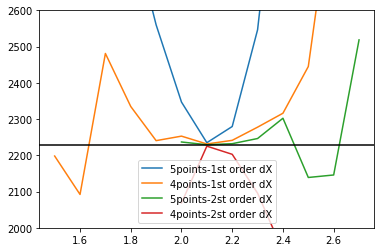

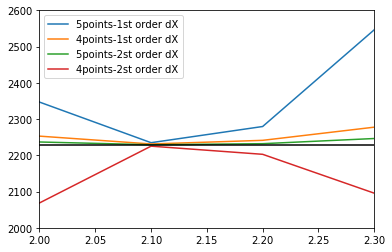

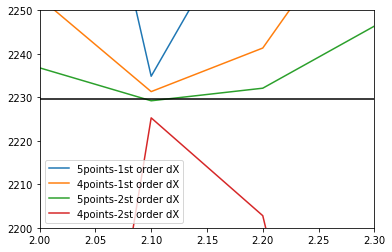

In [44]:
snd_approx4=[]
for x in results4:
    if len(x)==6:
        snd_approx4.append(x)
snd_approx=[]
for x in results:
    if len(x)==7:
        snd_approx.append(x)
plt.plot([x[0] for x in results],[x[5][1] for x in results],label='5points-1st order dX')
plt.plot([x[0] for x in results4],[x[4][1] for x in results4],label='4points-1st order dX')
plt.plot([x[0] for x in snd_approx],[x[6][1] for x in snd_approx],label='5points-2st order dX')
plt.plot([x[0] for x in snd_approx4],[x[5][1] for x in snd_approx4],label='4points-2st order dX')
plt.axhline(2229.558, color="black")
plt.ylim(2000,2600)
plt.legend()
plt.show()
plt.plot([x[0] for x in results],[x[5][1] for x in results],label='5points-1st order dX')
plt.plot([x[0] for x in results4],[x[4][1] for x in results4],label='4points-1st order dX')
plt.plot([x[0] for x in snd_approx],[x[6][1] for x in snd_approx],label='5points-2st order dX')
plt.plot([x[0] for x in snd_approx4],[x[5][1] for x in snd_approx4],label='4points-2st order dX')
plt.axhline(2229.558, color="black")
plt.ylim(2000,2600)
plt.xlim(2.,2.3)
plt.legend()
plt.show()
plt.plot([x[0] for x in results],[x[5][1] for x in results],label='5points-1st order dX')
plt.plot([x[0] for x in results4],[x[4][1] for x in results4],label='4points-1st order dX')
plt.plot([x[0] for x in snd_approx],[x[6][1] for x in snd_approx],label='5points-2st order dX')
plt.plot([x[0] for x in snd_approx4],[x[5][1] for x in snd_approx4],label='4points-2st order dX')
plt.axhline(2229.558, color="black")
plt.ylim(2200,2250)
plt.xlim(2.,2.3)
plt.legend()
plt.show()

In [ ]:
plt.plot([x[0] for x in results],[x[5][1] for x in results])
for x in results: print x[0],x[5][1]
plt.axhline(2229.558, color="red")
plt.ylim(2200,2300)
plt.show()
plt.plot([x[0] for x in results],[x[5][0] for x in results])
for x in results: print x[0],x[5][0]
plt.axhline(2.1268, color="red")
plt.ylim(2.,2.3000)
plt.show()
snd_approx=[]
for x in results:
    if len(x)==7:
        snd_approx.append(x)
plt.plot([x[0] for x in snd_approx],[x[6][1] for x in snd_approx])
for x in snd_approx: print x[0],x[6][1]
plt.axhline(2229.558, color="red")
plt.ylim(2200,2300)
plt.show()
for x in snd_approx: print x[0],x[6][0]
plt.plot([x[0] for x in snd_approx],[x[6][0] for x in snd_approx])
plt.ylim(2.,2.3000)
plt.axhline(2.1268, color="red")

1.5 2198.031439804039
1.6 2092.025275717348
1.7 2481.041189299285
1.8 2334.685384016087
1.9000000000000001 2240.4966441207985
2.0 2252.936376649165
2.1 2231.316244904998
2.2 2241.3381009185814
2.3000000000000003 2277.686100801375
2.4000000000000004 2316.137782449277
2.5 2445.0354443530046
2.6000000000000005 2949.518699570991
2.7 4638.593177824016


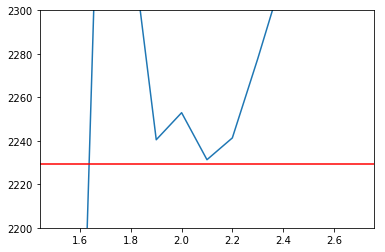

1.5 1.7641353436427791
1.6 1.8513553577927553
1.7 1.9290241942670612
1.8 1.9970530392883261
1.9000000000000001 2.0572221254475322
2.0 2.1025102397476862
2.1 2.12553222571226
2.2 2.114989329145143
2.3000000000000003 2.0443428134234836
2.4000000000000004 1.8659425195699533
2.5 1.4988070852109934
2.6000000000000005 0.533987597920289
2.7 -4.710366841452788


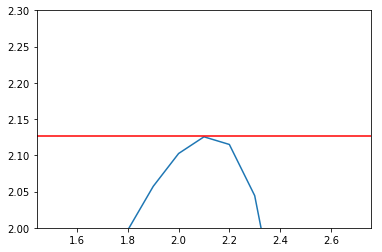

2.0 2068.536208918823
2.1 2225.282658024068
2.2 2202.782569158011
2.3000000000000003 2095.527421227471
2.4000000000000004 1935.6567038837966
2.5 1791.5644065150682
2.6000000000000005 1694.034340221527
2.7 1565.0441061059896


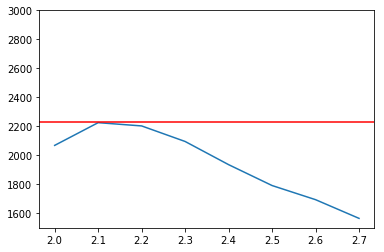

2.0 2.132429579294496
2.1 2.126860810531421
2.2 2.1261868666368513
2.3000000000000003 2.1180688986129494
2.4000000000000004 2.090978219476473
2.5 2.0483878210656754
2.6000000000000005 2.0005755815416326
2.7 1.899398212335376


(2.0, 2.3)

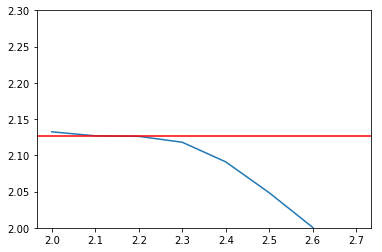

In [32]:
plt.plot([x[0] for x in results4],[x[4][1] for x in results4])
for x in results4: print x[0],x[4][1]
plt.axhline(2229.558, color="red")
plt.ylim(2200,2300)
plt.show()
plt.plot([x[0] for x in results4],[x[4][0] for x in results4])
for x in results4: print x[0],x[4][0]
plt.axhline(2.1268, color="red")
plt.ylim(2.0,2.3)
plt.show()
snd_approx4=[]
for x in results4:
    if len(x)==6:
        snd_approx4.append(x)
plt.plot([x[0] for x in snd_approx4],[x[5][1] for x in snd_approx4])
for x in snd_approx4: print x[0],x[5][1]
plt.axhline(2229.558, color="red")
plt.ylim(1500,3000)
plt.show()
for x in snd_approx4: print x[0],x[5][0]
plt.plot([x[0] for x in snd_approx4],[x[5][0] for x in snd_approx4])
plt.axhline(2.1268, color="red")
plt.ylim(2.0,2.3)

In [ ]:
for i in range(1,5):
    plt.plot([x[0] for x in results],[x[i] for x in results])
    if i<4:
        plt.plot([x[0] for x in results4],[x[i] for x in results4])
    plt.axhline(0, color="red")
    plt.axvline(2.1268, color="red")
    plt.show()

In [ ]:
for i in range(1,len(results)):
    print results[i][0]
    for j in range(3,5):
        print results[i][j]/results[i][j-1]